# Submission Akhir: Menyelesaikan Permasalahan Institusi Pendidikan


- Nama:Amelia Gizzela Sheehan Auni
- Email: gizelaseehan@gmail.com
- User Dicoding: amelia_gizzela_2711

# 1. Business Understanding

**Masalah:** Tingginya angka dropout mahasiswa di Jaya Jaya Institut.
**Tujuan:** Memprediksi sejak awal siapa saja siswa yang berisiko tinggi dropout agar dapat diberikan intervensi dini.
**Keberhasilan:** Model mampu memprediksi dropout dengan akurasi tinggi dan bisa digunakan oleh pihak akademik.


# 2. Persiapan

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# Modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 3. Data Understanding

In [2]:
# Load Dataset (dengan delimiter ;)
df = pd.read_csv('data/data.csv', delimiter=';')

# Melihat Struktur Data
print("Shape (jumlah baris, kolom):", df.shape)
display(df.head())
display(df.tail())


Shape (jumlah baris, kolom): (4424, 37)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [3]:
# Menampilkan Informasi Kolom
print("\nInformasi DataFrame:")
df.info()

print("\nNama Kolom:")
print(df.columns.tolist())


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                    

In [4]:
# Statistik Deskriptif untuk Data Numerik
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:

# Statistik untuk Data Kategorikal (contoh 5 kolom pertama)
print("\nDistribusi Kolom Kategorikal (contoh 5):")
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols[:5]:
    print(f"\nDistribusi nilai pada kolom '{col}':")
    print(df[col].value_counts())



Distribusi Kolom Kategorikal (contoh 5):

Distribusi nilai pada kolom 'Status':
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [6]:

# Cek Missing Value
print("\nMissing Values per Kolom:")
print(df.isnull().sum())



Missing Values per Kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment      

In [7]:

# Cek Duplikasi
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())



Jumlah Data Duplikat:
0



Distribusi Kelas pada Kolom 'Status':
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


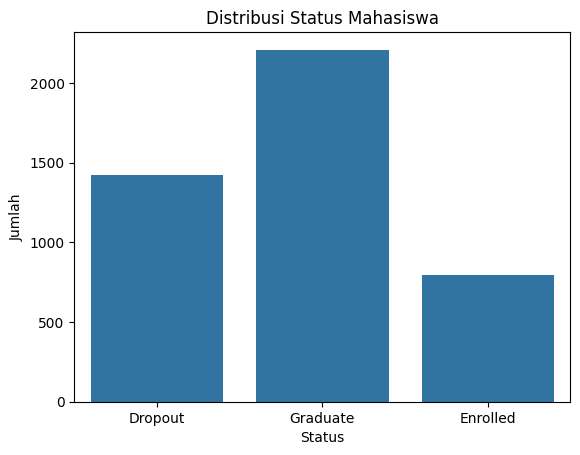

In [8]:

# Cek Distribusi Target (Diasumsikan kolom target bernama 'Status')
if 'Status' in df.columns:
    print("\nDistribusi Kelas pada Kolom 'Status':")
    print(df['Status'].value_counts())
    sns.countplot(data=df, x='Status')
    plt.title('Distribusi Status Mahasiswa')
    plt.xlabel('Status')
    plt.ylabel('Jumlah')
    plt.show()
else:
    print("\nKolom target tidak ditemukan.")

# 4. Data Preparation

In [9]:
# 1. Copy dataframe untuk preprocessing
df_prep = df.copy()

# 2. Encode Kolom Target (jika belum dalam format numerik)
# Misalnya: Dropout=0, Enrolled=1, Graduate=2
if df_prep['Status'].dtype == 'object':
    status_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
    df_prep['Status'] = df_prep['Status'].map(status_mapping)

# 3. Pisahkan fitur dan target
X = df_prep.drop(columns='Status')
y = df_prep['Status']

# 4. Cek kolom kategorikal (integer yang sebenarnya kategori)
categorical_cols = [
    col for col in X.columns 
    if (X[col].nunique() < 20 and X[col].dtype in ['int64', 'object'])
]

# 5. One-Hot Encoding untuk kolom kategorikal
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 6. Feature Scaling untuk kolom numerik
from sklearn.preprocessing import StandardScaler

numerical_cols = X_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# 7. Split data train dan test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

joblib.dump(X_train.columns.tolist(), 'feature_names.pkl')


# 8. Tampilkan ringkasan hasil
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_test :", y_test.shape)


Shape X_train: (3539, 126)
Shape y_train: (3539,)
Shape X_test : (885, 126)
Shape y_test : (885,)


Distribusi Target (Keseluruhan):
Status
2    0.499322
0    0.321203
1    0.179476
Name: proportion, dtype: float64


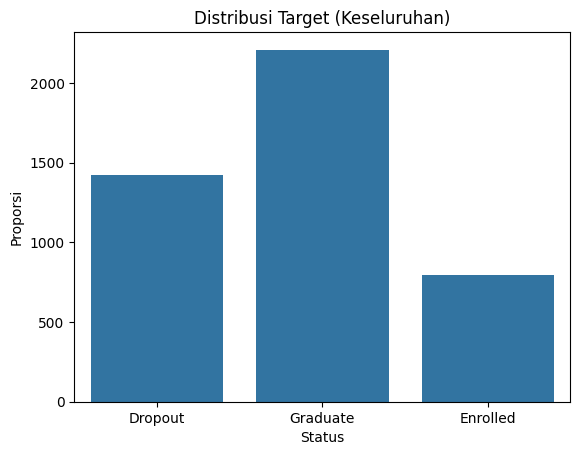


Distribusi Target (Data Training):
Status
2    0.499294
0    0.321277
1    0.179429
Name: proportion, dtype: float64


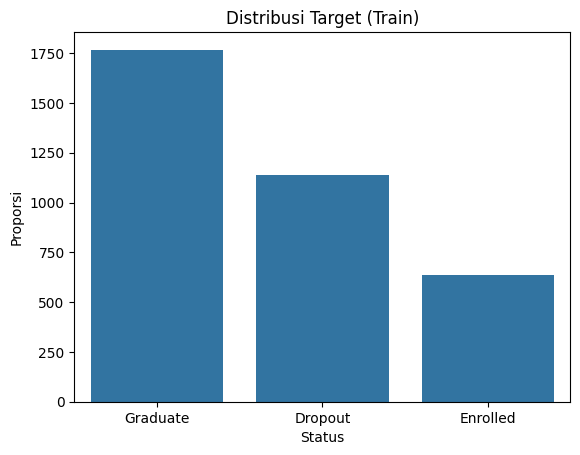


Distribusi Target (Data Test):
Status
2    0.499435
0    0.320904
1    0.179661
Name: proportion, dtype: float64


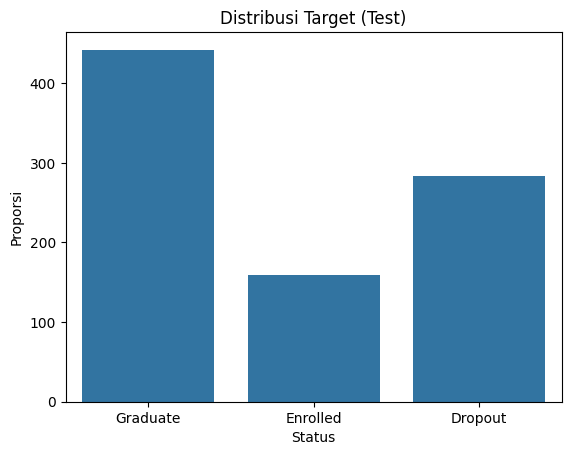

In [10]:
# 1. Cek distribusi label di seluruh data
print("Distribusi Target (Keseluruhan):")
print(y.value_counts(normalize=True))
sns.countplot(x=y.map({0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}))
plt.title("Distribusi Target (Keseluruhan)")
plt.xlabel("Status")
plt.ylabel("Proporsi")
plt.show()

# 2. Cek distribusi label di data training
print("\nDistribusi Target (Data Training):")
print(y_train.value_counts(normalize=True))
sns.countplot(x=y_train.map({0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}))
plt.title("Distribusi Target (Train)")
plt.xlabel("Status")
plt.ylabel("Proporsi")
plt.show()

# 3. Cek distribusi label di data test
print("\nDistribusi Target (Data Test):")
print(y_test.value_counts(normalize=True))
sns.countplot(x=y_test.map({0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}))
plt.title("Distribusi Target (Test)")
plt.xlabel("Status")
plt.ylabel("Proporsi")
plt.show()


# 5. Modelling


==== Logistic Regression ====


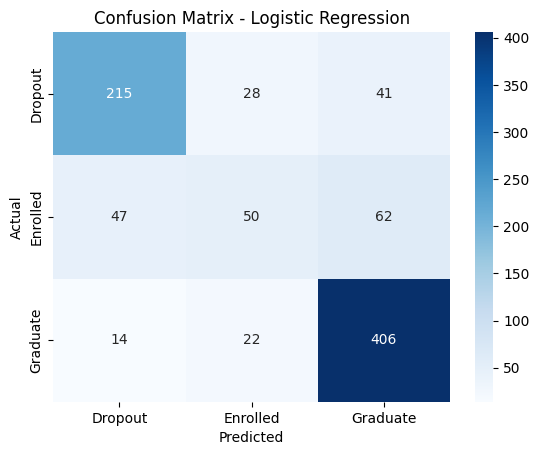

              precision    recall  f1-score   support

     Dropout       0.78      0.76      0.77       284
    Enrolled       0.50      0.31      0.39       159
    Graduate       0.80      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885


==== Random Forest ====


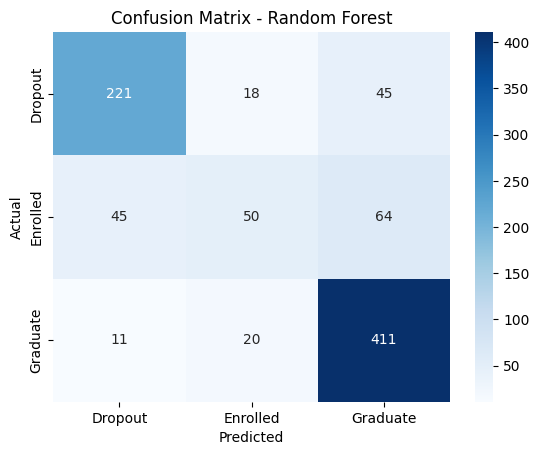

              precision    recall  f1-score   support

     Dropout       0.80      0.78      0.79       284
    Enrolled       0.57      0.31      0.40       159
    Graduate       0.79      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885


==== XGBoost ====


c:\Users\gizel\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:51:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


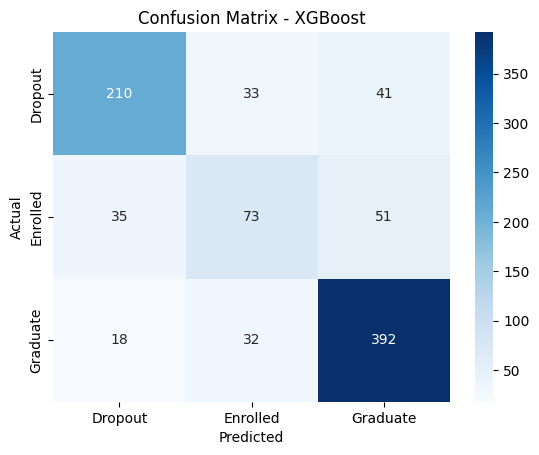

              precision    recall  f1-score   support

     Dropout       0.80      0.74      0.77       284
    Enrolled       0.53      0.46      0.49       159
    Graduate       0.81      0.89      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.76      0.76      0.76       885



In [11]:
# Inisialisasi Model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Training dan Evaluasi Model
for name, model in models.items():
    print(f"\n==== {name} ====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Dropout', 'Enrolled', 'Graduate'],
                yticklabels=['Dropout', 'Enrolled', 'Graduate'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    print(classification_report(y_test, y_pred, target_names=['Dropout', 'Enrolled', 'Graduate']))


# 6. 10 Faktor paling berpengaruh di Drouput Student

Tabel Top 10 Faktor Paling Berpengaruh:


,Faktor,Tingkat_Kepentingan
15,Curricular_units_2nd_sem_approved,0.127748
11,Curricular_units_1st_sem_approved,0.089100
16,Curricular_units_2nd_sem_grade,0.089079
12,Curricular_units_1st_sem_grade,0.065517
6,Admission_grade,0.040004
7,Age_at_enrollment,0.038540
14,Curricular_units_2nd_sem_evaluations,0.038028
0,Previous_qualification_grade,0.035135
10,Curricular_units_1st_sem_evaluations,0.034020
85,Tuition_fees_up_to_date_1,0.034012



Berhasil! Tabel faktor paling berpengaruh telah disimpan sebagai 'top_10_dropout_factors.csv'


C:\Users\gizel\AppData\Local\Temp\ipykernel_18296\1241535468.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tingkat_Kepentingan', y='Faktor', data=top_10_factors, palette='viridis')


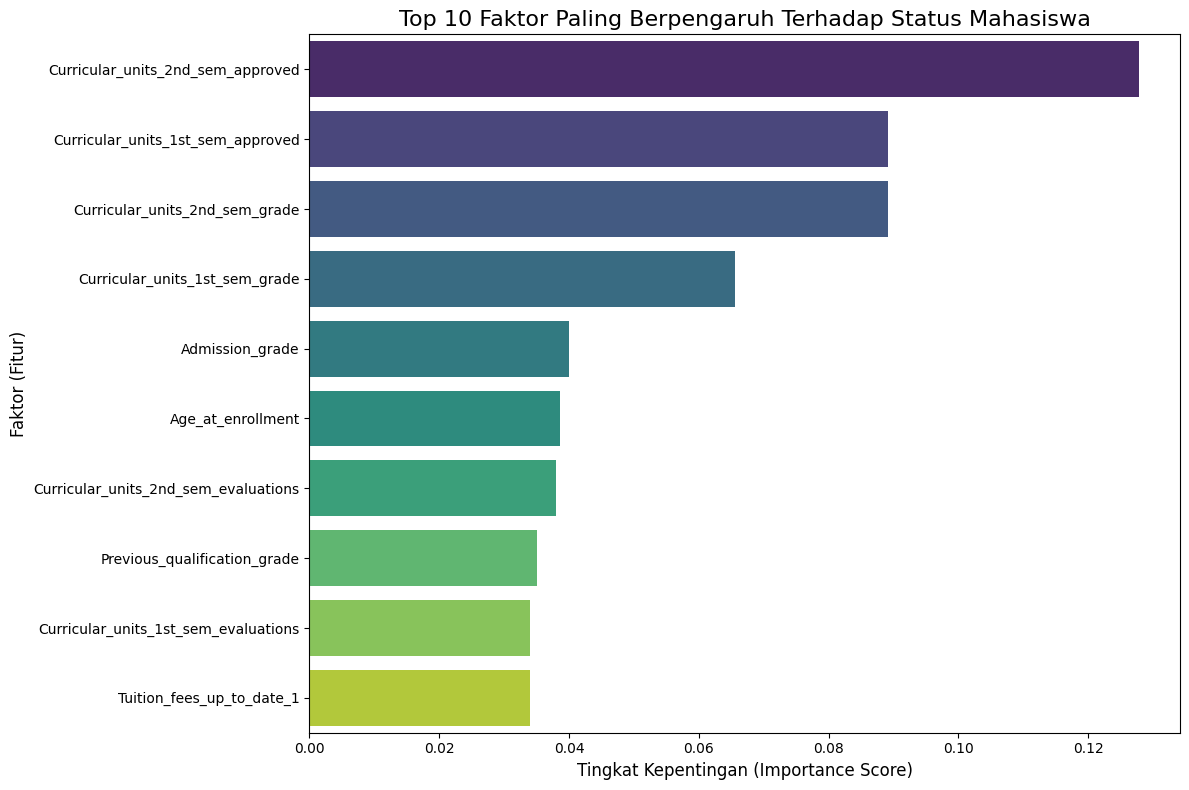

In [12]:

# 1. Mengambil model Random Forest yang sudah dilatih dari dictionary 'models'
# Pastikan sel training model sudah dijalankan sebelumnya
rf_model = models['Random Forest']

# 2. Mengekstrak skor kepentingan fitur dan nama fiturnya
# X_train.columns berisi nama fitur setelah one-hot encoding
importances = rf_model.feature_importances_
feature_names = X_train.columns

# 3. Membuat DataFrame untuk memudahkan analisis
feature_importance_df = pd.DataFrame({
    'Faktor': feature_names,
    'Tingkat_Kepentingan': importances
})

# 4. Mengurutkan DataFrame untuk mendapatkan 10 faktor paling berpengaruh
top_10_factors = feature_importance_df.sort_values(by='Tingkat_Kepentingan', ascending=False).head(10)

# 5. Menampilkan tabel 10 faktor teratas di notebook
print("Tabel Top 10 Faktor Paling Berpengaruh:")
display(top_10_factors)

# 6. Menyimpan tabel ini ke dalam file CSV baru
output_filename = 'top_10_dropout_factors.csv'
top_10_factors.to_csv(output_filename, index=False)
print(f"\nBerhasil! Tabel faktor paling berpengaruh telah disimpan sebagai '{output_filename}'")

# 7. (Opsional) Membuat visualisasi bar chart untuk 10 faktor teratas
plt.figure(figsize=(12, 8))
sns.barplot(x='Tingkat_Kepentingan', y='Faktor', data=top_10_factors, palette='viridis')
plt.title('Top 10 Faktor Paling Berpengaruh Terhadap Status Mahasiswa', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance Score)', fontsize=12)
plt.ylabel('Faktor (Fitur)', fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
import joblib

# Simpan model Random Forest (misal model yang sudah dilatih bernama rf_model)
joblib.dump(models['Random Forest'], 'dropout_model.pkl')

# Simpan scaler yang sudah fit
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [14]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
